In [19]:
# CELL 1 — imports & config
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,5)
pd.options.display.max_columns = 200

# your data directory (NOW USING yfinance FOLDER)
DATA_DIR = "../yfinance"


In [20]:
# CELL 2 — load price data from local CSV file in yfinance folder

symbol = "AAPL"     # choose one: AAPL, AMZN, GOOG, META, MSFT, NVDA

file_path = os.path.join(DATA_DIR, f"{symbol}.csv")

df_price = pd.read_csv(file_path)

# detect the date column (Date or Timestamp)
date_col = [c for c in df_price.columns if c.lower() in ["date", "timestamp"]][0]

# convert to datetime (tz-aware)
df_price[date_col] = pd.to_datetime(df_price[date_col], utc=True)
df_price = df_price.set_index(date_col)

# keep only OHLCV columns
df_price = df_price[["Open", "High", "Low", "Close", "Volume"]]

df_price.head()


,Open,High,Low,Close,Volume
Date,,,,,
2009-01-02 00:00:00+00:00,2.575630,2.730385,2.554037,2.721686,746015200
2009-01-05 00:00:00+00:00,2.794266,2.884539,2.780469,2.836553,1181608400
2009-01-06 00:00:00+00:00,2.877641,2.914229,2.770872,2.789767,1289310400
2009-01-07 00:00:00+00:00,2.753477,2.774170,2.706990,2.729484,753048800
2009-01-08 00:00:00+00:00,2.712090,2.793666,2.700393,2.780169,673500800


In [21]:
import pandas_ta as ta

df = df_price.copy()

df.ta.sma(length=20, append=True)      # SMA20
df.ta.ema(length=50, append=True)      # EMA50
df.ta.rsi(length=14, append=True)      # RSI14
df.ta.macd(append=True)                # MACD

# Optional rename for clarity
df = df.rename(columns={
    'SMA_20':'MA20',
    'EMA_50':'MA50',
    'RSI_14':'RSI14',
    'MACD_12_26_9':'MACD',
    'MACDs_12_26_9':'MACD_signal',
    'MACDh_12_26_9':'MACD_hist'
})

df.tail()


,Open,High,Low,Close,Volume,MA20,MA50,RSI14,MACD,MACD_hist,MACD_signal
Date,,,,,,,,,,,
2023-12-22 00:00:00+00:00,193.353962,193.581821,191.164647,191.788757,37149600,191.856618,186.389576,54.672784,2.633141,-0.602115,3.235256
2023-12-26 00:00:00+00:00,191.798670,192.076049,191.025969,191.243912,28919300,192.018094,186.579942,53.090049,2.304751,-0.744404,3.049155
2023-12-27 00:00:00+00:00,190.689158,191.689703,189.302247,191.342972,48087700,192.154308,186.766728,53.354446,2.029104,-0.816041,2.845145
2023-12-28 00:00:00+00:00,192.323710,192.838849,191.362784,191.768951,34049900,192.362839,186.962893,54.540999,1.823998,-0.816918,2.640915
2023-12-29 00:00:00+00:00,192.085953,192.581275,189.936256,190.728775,42672100,192.490633,187.110575,51.121347,1.559539,-0.865101,2.424640


In [24]:
import numpy as np

# daily returns
df_price["return"] = df_price["Close"].pct_change()
df_price["log_return"] = np.log(df_price["Close"]).diff()

# 30-day rolling volatility (annualized)
df_price["volatility_30d"] = df_price["return"].rolling(30).std() * np.sqrt(252)

# 30-day rolling Sharpe ratio (assuming risk-free rate = 0)
df_price["sharpe_30d"] = df_price["return"].rolling(30).mean() / df_price["return"].rolling(30).std() * np.sqrt(252)

df_price.tail()


,Open,High,Low,Close,Volume,return,log_return,volatility_30d,sharpe_30d
Date,,,,,,,,,
2023-12-22 00:00:00+00:00,193.353962,193.581821,191.164647,191.788757,37149600,-0.005548,-0.005563,0.148199,3.524014
2023-12-26 00:00:00+00:00,191.798670,192.076049,191.025969,191.243912,28919300,-0.002841,-0.002845,0.134498,2.255371
2023-12-27 00:00:00+00:00,190.689158,191.689703,189.302247,191.342972,48087700,0.000518,0.000518,0.131291,2.892778
2023-12-28 00:00:00+00:00,192.323710,192.838849,191.362784,191.768951,34049900,0.002226,0.002224,0.125622,2.216948
2023-12-29 00:00:00+00:00,192.085953,192.581275,189.936256,190.728775,42672100,-0.005424,-0.005439,0.126878,1.634583


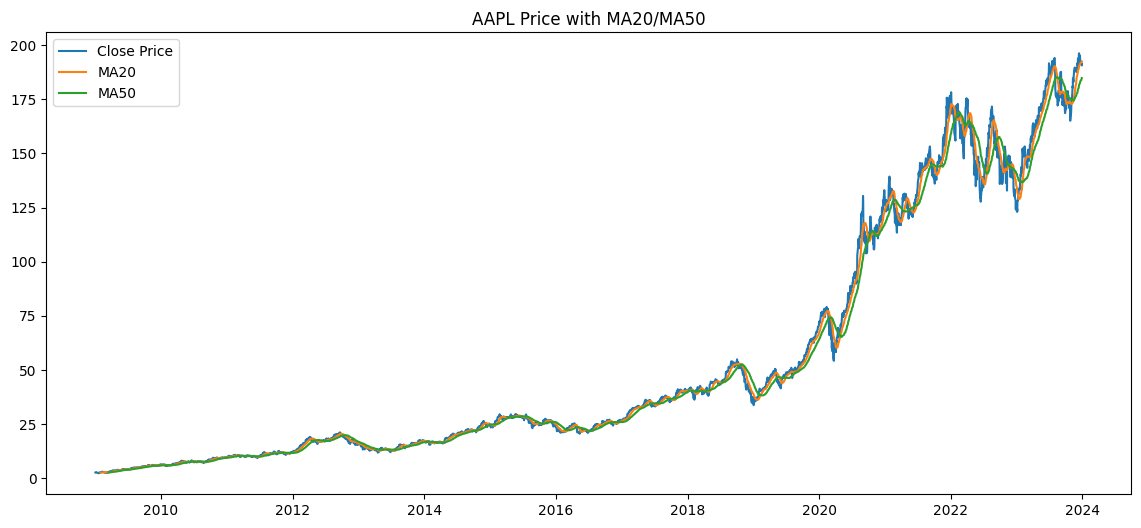

In [27]:
# cell 5a: Price + MAs
# Moving averages manually
df_price["MA20"] = df_price["Close"].rolling(window=20).mean()
df_price["MA50"] = df_price["Close"].rolling(window=50).mean()

plt.figure(figsize=(14,6))
plt.plot(df_price["Close"], label="Close Price")
plt.plot(df_price["MA20"], label="MA20")
plt.plot(df_price["MA50"], label="MA50")
plt.title(f"{symbol} Price with MA20/MA50")
plt.legend()
plt.show()


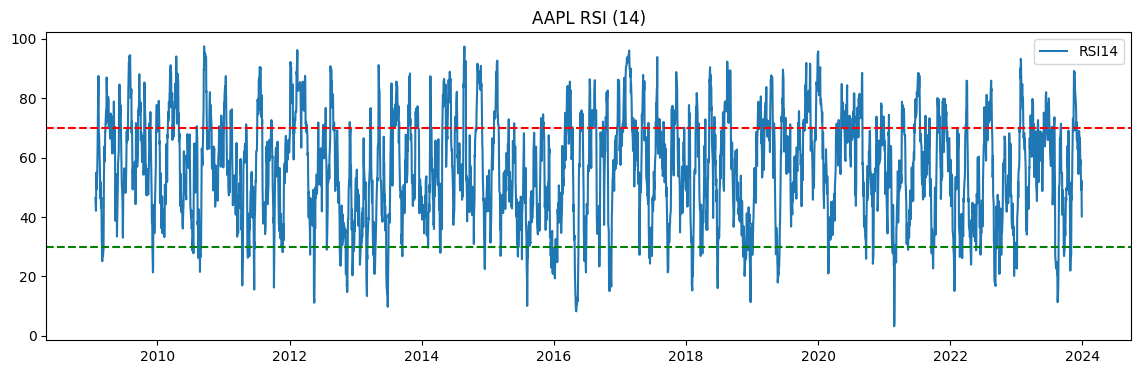

In [29]:
# Compute RSI manually
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_price["RSI14"] = compute_rsi(df_price["Close"], period=14)


plt.figure(figsize=(14,4))
plt.plot(df_price["RSI14"], label="RSI14")
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title(f"{symbol} RSI (14)")
plt.legend()
plt.show()


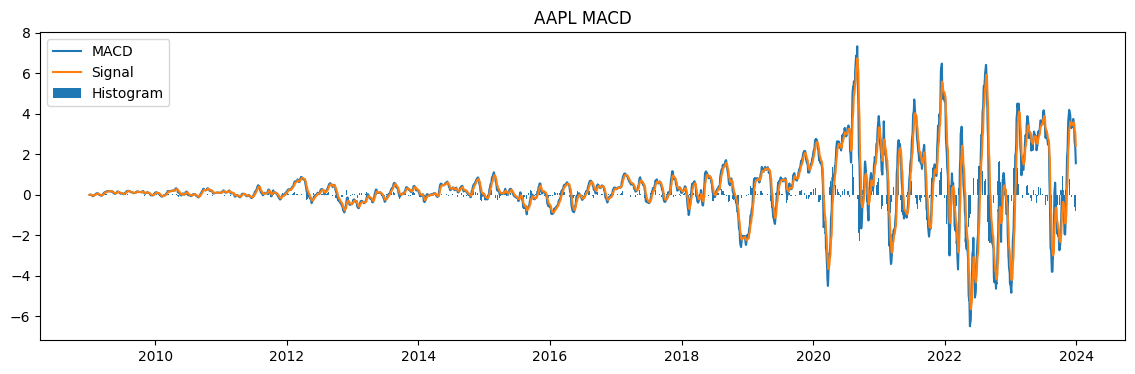

In [31]:
# cell 5c: MACD plot
# Compute MACD manually
def compute_macd(series, fast=12, slow=26, signal=9):
    ema_fast = series.ewm(span=fast, adjust=False).mean()
    ema_slow = series.ewm(span=slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    macd_signal = macd.ewm(span=signal, adjust=False).mean()
    macd_hist = macd - macd_signal
    return macd, macd_signal, macd_hist

df_price["MACD"], df_price["MACD_signal"], df_price["MACD_hist"] = compute_macd(df_price["Close"])

plt.figure(figsize=(14,4))
plt.plot(df_price["MACD"], label="MACD")
plt.plot(df_price["MACD_signal"], label="Signal")
plt.bar(df_price.index, df_price["MACD_hist"], label="Histogram")
plt.title(f"{symbol} MACD")
plt.legend()
plt.show()
